In [1]:
from common.problem import Problem
from algorithm.idlhc import IDLHC

# CONFIGURAÇÕES
generations = 100 # quantidade de gerações (ou iterações)
num_of_individuals = 100 # controla quantos indivíduos existem na população
num_of_variables = 100 # controla o tamanho do vetor de decisão
direction = "MAX" # se o problema é de maximização (MAX) ou de minimização (MIN)

# Parâmetros do IDLHC
num_pdf = 20 # quantos indivíduos são considerados para a construção da função de distribuição de probabilidade
num_cut_pdf = 0.1 # porcentagem utilizada para cortar opções

In [2]:
from common.knapsack import Knapsack
import random

capacity = 200
values= [random.randint(1, 100) for i in range(num_of_variables)]
weights= [random.randint(1, 100) for i in range(num_of_variables)]
ratios = [
    values[i] / weights[i]
    for i in range(num_of_variables)
]
sorted_ratio_indexes = sorted(
    range(len(ratios)), key=lambda i: ratios[i]
)

knapsack_vars = Knapsack(capacity = capacity, values = values, weights= weights,ratios = ratios, sorted_ratio_indexes=sorted_ratio_indexes)

In [3]:
def knapsack_bench(binary_values, knapsack_vars):
    if len(binary_values) != len(knapsack_vars.values) or len(binary_values) != len(
        knapsack_vars.weights
    ):
        return False

    total_value = 0
    total_weight = 0

    for i in range(len(binary_values)):
        if binary_values[i] != 0 and binary_values[i] != 1:
            return False
        elif binary_values[i] == 1:
            total_weight += knapsack_vars.weights[i]
            total_value += knapsack_vars.values[i]

    return total_value

# {"total_value": total_value, "total_weight": total_weight}

In [4]:
# {
#     "capacity": 200,
#     "values": [random.randint(1, 100) for i in range(num_of_variables)],
#     "weights": [random.randint(1, 100) for i in range(num_of_variables)],
#     "ratios": [],
#     "sorted_ratio_indexes": [],
#     "total_weight": 0,
#     "total_value": 0,
# }




# print(
#     knapsack_bench(
#         [random.randint(0, 1) for i in range(num_of_variables)], knapsack_vars
#     )
# )
# print(knapsack_vars["total_weight"], knapsack_vars["capacity"])

In [5]:
print(knapsack_vars.values, "\n", knapsack_vars.weights, "\n", knapsack_vars.ratios, "\n", knapsack_vars.sorted_ratio_indexes)

[55, 33, 13, 63, 77, 57, 6, 94, 5, 40, 24, 6, 74, 58, 71, 89, 52, 97, 100, 89, 75, 10, 43, 78, 1, 69, 18, 14, 75, 94, 24, 29, 4, 98, 2, 6, 69, 14, 91, 3, 7, 63, 32, 97, 39, 76, 23, 44, 86, 9, 98, 72, 75, 71, 66, 61, 73, 54, 74, 96, 56, 99, 8, 26, 72, 86, 69, 56, 7, 52, 14, 24, 61, 6, 34, 11, 41, 83, 9, 71, 94, 83, 20, 31, 97, 48, 45, 99, 59, 82, 6, 7, 19, 50, 31, 60, 38, 31, 54, 6] 
 [1, 24, 5, 81, 53, 67, 20, 62, 60, 38, 31, 76, 19, 32, 47, 77, 1, 62, 16, 46, 49, 45, 75, 23, 72, 32, 38, 8, 17, 19, 88, 48, 89, 88, 74, 19, 12, 62, 90, 75, 77, 24, 54, 61, 18, 59, 88, 8, 36, 17, 80, 81, 69, 19, 66, 82, 100, 78, 66, 81, 62, 62, 98, 21, 86, 9, 36, 57, 17, 10, 21, 78, 32, 43, 67, 53, 81, 75, 73, 5, 3, 6, 47, 93, 53, 100, 94, 1, 67, 38, 38, 67, 39, 99, 97, 38, 44, 41, 71, 89] 
 [55.0, 1.375, 2.6, 0.7777777777777778, 1.4528301886792452, 0.8507462686567164, 0.3, 1.5161290322580645, 0.08333333333333333, 1.0526315789473684, 0.7741935483870968, 0.07894736842105263, 3.8947368421052633, 1.8125, 1.51

In [6]:
# define a classe de problema
problem = Problem(num_of_variables=num_of_variables,
                      num_of_individuals=num_of_individuals,
                      num_of_generations=generations,
                      objective=[knapsack_bench],# ATENÇÃO: aqui ele passa uma função
                    #   repair=[knapsack_repair],
                      objective_vars= knapsack_vars,
                      mutation=(1/num_of_variables),
                      variables_range=[0, 1],
                      direction=direction,
                      initial_population_type=2,)

Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Generation: 65
Generation: 66
Gener

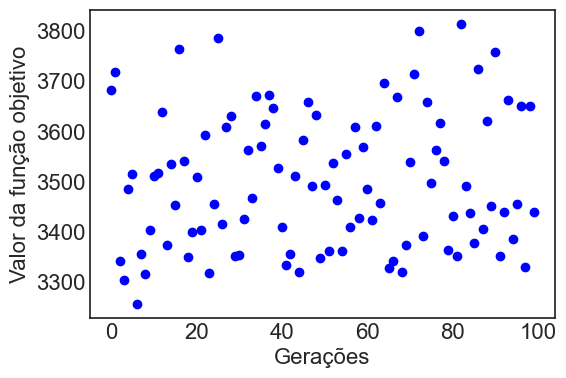

In [7]:
num_iterations = 1

first_gens = []
best_values = []
population_gen_type = problem.initial_population_type
problem_type = "knapsack"

for i in range(num_iterations):
    iteration = IDLHC(problem, num_pdf=num_pdf, num_cut_pdf=num_cut_pdf)
    iteration.do()
    best_value = max(iteration.convergence_array)
    best_values.append(best_value)

    for n in range(len(iteration.convergence_array)):
        if iteration.convergence_array[n] == best_values[i]:
            first_gens.append(n)
            break
    
    # item_var = {"Iteration": i, "Best value per generation": max(iteration.convergence_array), "First generation to reach best value": n, "type": problem.initial_population_type}



In [8]:
import pandas as pd
from pathlib import Path  

df2 = pd.DataFrame(

    {
        "best_value" : best_values,
        "firstgen_with_best_value": first_gens,
        "population_gen_type": population_gen_type,
        "problem_type" : problem_type
    }
)

filepath = Path('metrics/testes_sla.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

df2.to_csv(filepath,mode='a',index=False,header=False)